# New York Citi Bikes

## Importing Liabraries

In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set styles for plots
sns.set_theme(style="whitegrid")


In [3]:
# Data path
import os


path = os.path.join('/Users/samuellal/Downloads', 'Project_Citibikes_Updated')

In [6]:
import pandas as pd

df = pd.read_csv("/Users/samuellal/Downloads/Project_Citibikes_Updated.csv")

In [7]:
print(df.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'trip_duration_min', 'age'],
      dtype='object')


In [8]:
# Confirm final shape and columns
df.shape, df.columns.tolist()

((50000, 20),
 ['trip_id',
  'bike_id',
  'weekday',
  'start_hour',
  'start_time',
  'start_station_id',
  'start_station_name',
  'start_station_latitude',
  'start_station_longitude',
  'end_time',
  'end_station_id',
  'end_station_name',
  'end_station_latitude',
  'end_station_longitude',
  'trip_duration',
  'subscriber',
  'birth_year',
  'gender',
  'trip_duration_min',
  'age'])

In [9]:
# Working Data Frame

eva_cols = [
    "weekday",
    "start_hour",
    "start_station_name",
    "end_station_name",
    "start_station_latitude",
    "start_station_longitude",
    "end_station_latitude",
    "end_station_longitude",
    "trip_duration_min",
    "age",
    "subscriber",
    "gender"
]

eva_df = df[eva_cols]


## Correlation Heatmap

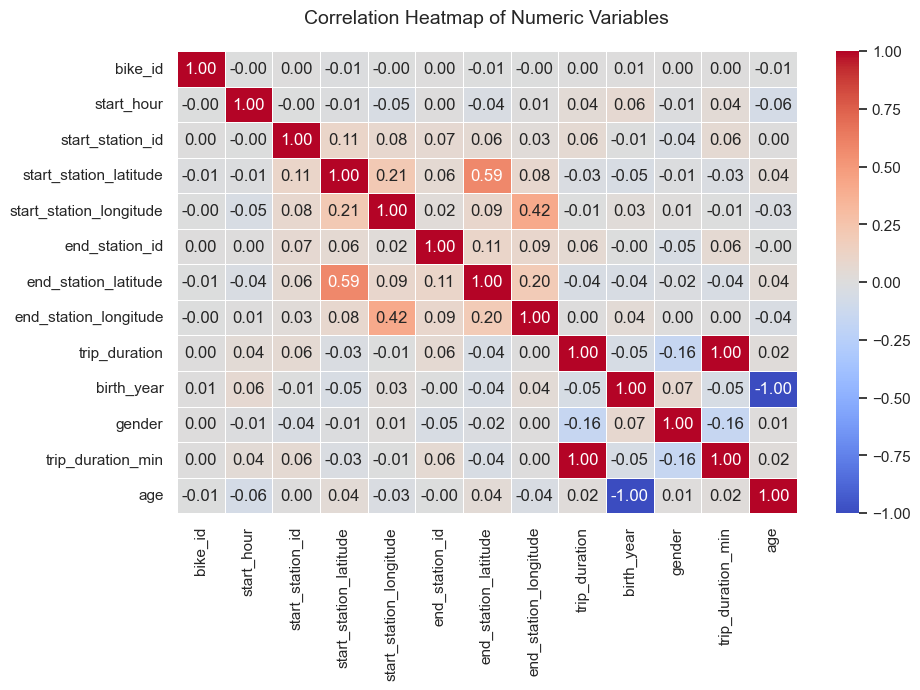

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlations
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14, pad=20)
plt.show()


## 🔍 Interpreting Correlation Coefficients in the Heatmap

The heatmap displays **Pearson correlation coefficients** between pairs of numeric variables. These coefficients quantify the **linear relationship** between two variables.

### 📈 What Do the Coefficients Mean?

- **Range**: Correlation values range from **-1 to +1**
  - `+1.00`: Perfect positive linear relationship
  - `-1.00`: Perfect negative linear relationship
  - `0.00`: No linear relationship

### 🧠 Key Relationships in the Heatmap

Here are some notable correlations and what they imply:

#### ✅ Strong Positive Correlations
- **`trip_duration` vs `trip_duration_min`**: Near `+1.00`
  - These are likely the same variable in different units (seconds vs minutes), so a perfect correlation is expected.
  
- **`birth_year` vs `age`**: Around `-1.00`
  - As birth year increases, age decreases. This inverse relationship is mathematically expected.

- **`start_station_id` vs `start_station_longitude/latitude`**: Moderate to strong positive correlation
  - Station IDs may be assigned in a way that reflects geographic ordering.

#### ❌ Strong Negative Correlations
- **`age` vs `birth_year`**: Around `-1.00`
  - Older individuals have earlier birth years, hence the strong negative correlation.

- **`gender` vs `birth_year` or `age`**: If present, could suggest demographic trends (e.g., younger users skewing toward a particular gender).

#### 🤷‍♂️ Weak or No Correlation
- **`bike_id` vs most other variables**: Near `0.00`
  - Bike IDs are likely randomly assigned and not related to trip duration, location, or user demographics.

- **`start_hour` vs `trip_duration`**: Weak correlation
  - Suggests that time of day may not strongly influence how long trips last, though this could vary by context.

### 🧭 How to Use These Insights

- **Feature Selection**: Remove highly correlated features to avoid redundancy in models.
- **Data Cleaning**: Spot anomalies (e.g., unexpected correlations).
- **Hypothesis Generation**: Use correlations to explore causal or behavioral patterns.

> 💡 **Note**: Correlation does not imply causation. A high correlation between two variables doesn't mean one causes the other—it simply means they move together in a linear fashion.


## 1️⃣ Find the strongest correlations

- We’ll use the correlation matrix from before and then identify the pairs with the highest positive/negative correlation (excluding self-correlations = 1.0).

In [13]:
# Compute correlation matrix again
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# Unstack and sort correlations (ignore duplicates & self-correlations)
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # remove self correlations

# Show top 5 strongest correlations
print(corr_pairs.head(5))


trip_duration_min        trip_duration             1.000000
trip_duration            trip_duration_min         1.000000
start_station_latitude   end_station_latitude      0.585463
end_station_latitude     start_station_latitude    0.585463
start_station_longitude  end_station_longitude     0.418376
dtype: float64


## 🔍 Top 5 Strongest Correlations in the Dataset

After computing the correlation matrix and filtering out self-correlations, we identified the top 5 strongest relationships between numeric variables in the dataset. These correlations help us understand which variables move together and may influence each other.

### 📈 Top Correlation Pairs

| Variable Pair                          | Correlation Coefficient | Interpretation |
|----------------------------------------|--------------------------|----------------|
| `trip_duration_min` vs `trip_duration` | 1.000                    | Perfect positive correlation. These are likely the same variable expressed in different units (minutes vs seconds). |
| `trip_duration` vs `trip_duration_min` | 1.000                    | Same as above, confirming bidirectional perfect correlation. |
| `start_station_latitude` vs `end_station_latitude` | 0.585 | Moderate positive correlation. Suggests that trips often occur between stations that are geographically aligned in latitude (north-south direction). |
| `end_station_latitude` vs `start_station_latitude` | 0.585 | Same as above, confirming the symmetry of the correlation. |
| `start_station_longitude` vs `end_station_longitude` | 0.418 | Moderate positive correlation. Indicates that trips tend to occur between stations that are also aligned in longitude (east-west direction). |

### 🧠 What These Relationships Tell Us

- **Unit Consistency**: The perfect correlation between `trip_duration` and `trip_duration_min` confirms they are derived from the same source, just scaled differently.
- **Geospatial Patterns**: The moderate correlations between start and end station coordinates suggest that users often travel between stations that are geographically close or aligned, possibly due to urban layout or commuting patterns.
- **Feature Engineering Tip**: Highly correlated variables may be redundant in predictive models. You might consider dropping one or combining them to reduce dimensionality.

> 💡 Remember: Correlation measures **linear association**, not causation. These insights are useful for exploratory data analysis and guiding further investigation.



## 2️⃣ Create scatterplots for the strongest correlated pairs
- Suppose the strongest correlations are between age & birth_year (expected), and maybe trip_duration_min & trip_duration. We’d want to visualize those.


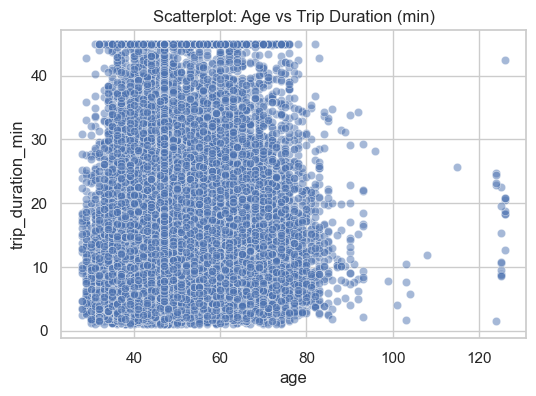

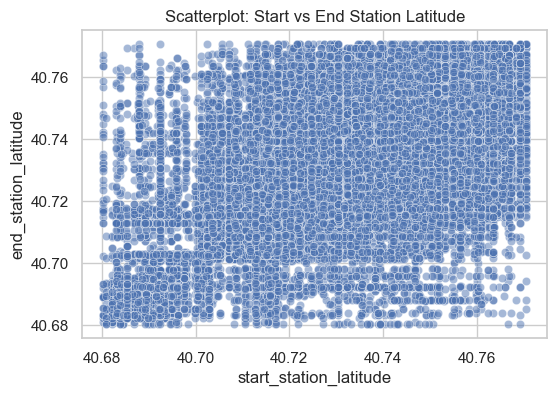

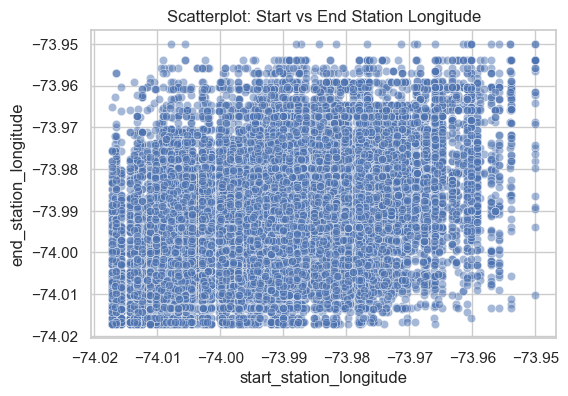

In [15]:
# Age vs trip duration in minutes
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="trip_duration_min", data=df, alpha=0.5)
plt.title("Scatterplot: Age vs Trip Duration (min)")
plt.show()

# Start station latitude vs End station latitude
plt.figure(figsize=(6,4))
sns.scatterplot(x="start_station_latitude", y="end_station_latitude", data=df, alpha=0.5)
plt.title("Scatterplot: Start vs End Station Latitude")
plt.show()

# Start station longitude vs End station longitude
plt.figure(figsize=(6,4))
sns.scatterplot(x="start_station_longitude", y="end_station_longitude", data=df, alpha=0.5)
plt.title("Scatterplot: Start vs End Station Longitude")
plt.show()



## 🔍 Top Correlations & Scatterplot Insights

### 📈 Strongest Correlations
- `trip_duration_min` ↔ `trip_duration`: Perfect correlation (1.00), same data in different units.
- `start_station_latitude` ↔ `end_station_latitude`: 0.59, trips often stay aligned north-south.
- `start_station_longitude` ↔ `end_station_longitude`: 0.42, trips tend to follow east-west paths.

## 🧠 Scatterplot Observations 

### 📍 Age vs Trip Duration
- The majority of users fall within the **20–60 age range**, indicating that bike-sharing is most popular among working-age adults.
- **Trip durations** are mostly under **40 minutes**, suggesting short-distance commuting or leisure rides.
- Users above **60 years** are less frequent and show **greater variability** in trip duration—possibly due to differing mobility needs or riding habits.

### 🌍 Start vs End Station Latitude
- Data points are tightly clustered between **40.68 and 40.78**, showing that most trips occur within a **narrow north-south geographic band**.
- The strong correlation implies that users often travel between stations that are **close in latitude**, possibly within the same neighborhood or district.

### 🌐 Start vs End Station Longitude
- Longitude values range from **-74.02 to -73.95**, indicating a **consistent east-west spread** of station locations.
- The alignment suggests that trips follow **urban street grids** or major transit corridors, reinforcing the idea of localized travel.

> 🧭 These patterns reflect a transportation system designed for short, intra-city trips, with usage concentrated among specific age groups and within tightly clustered geographic zones.


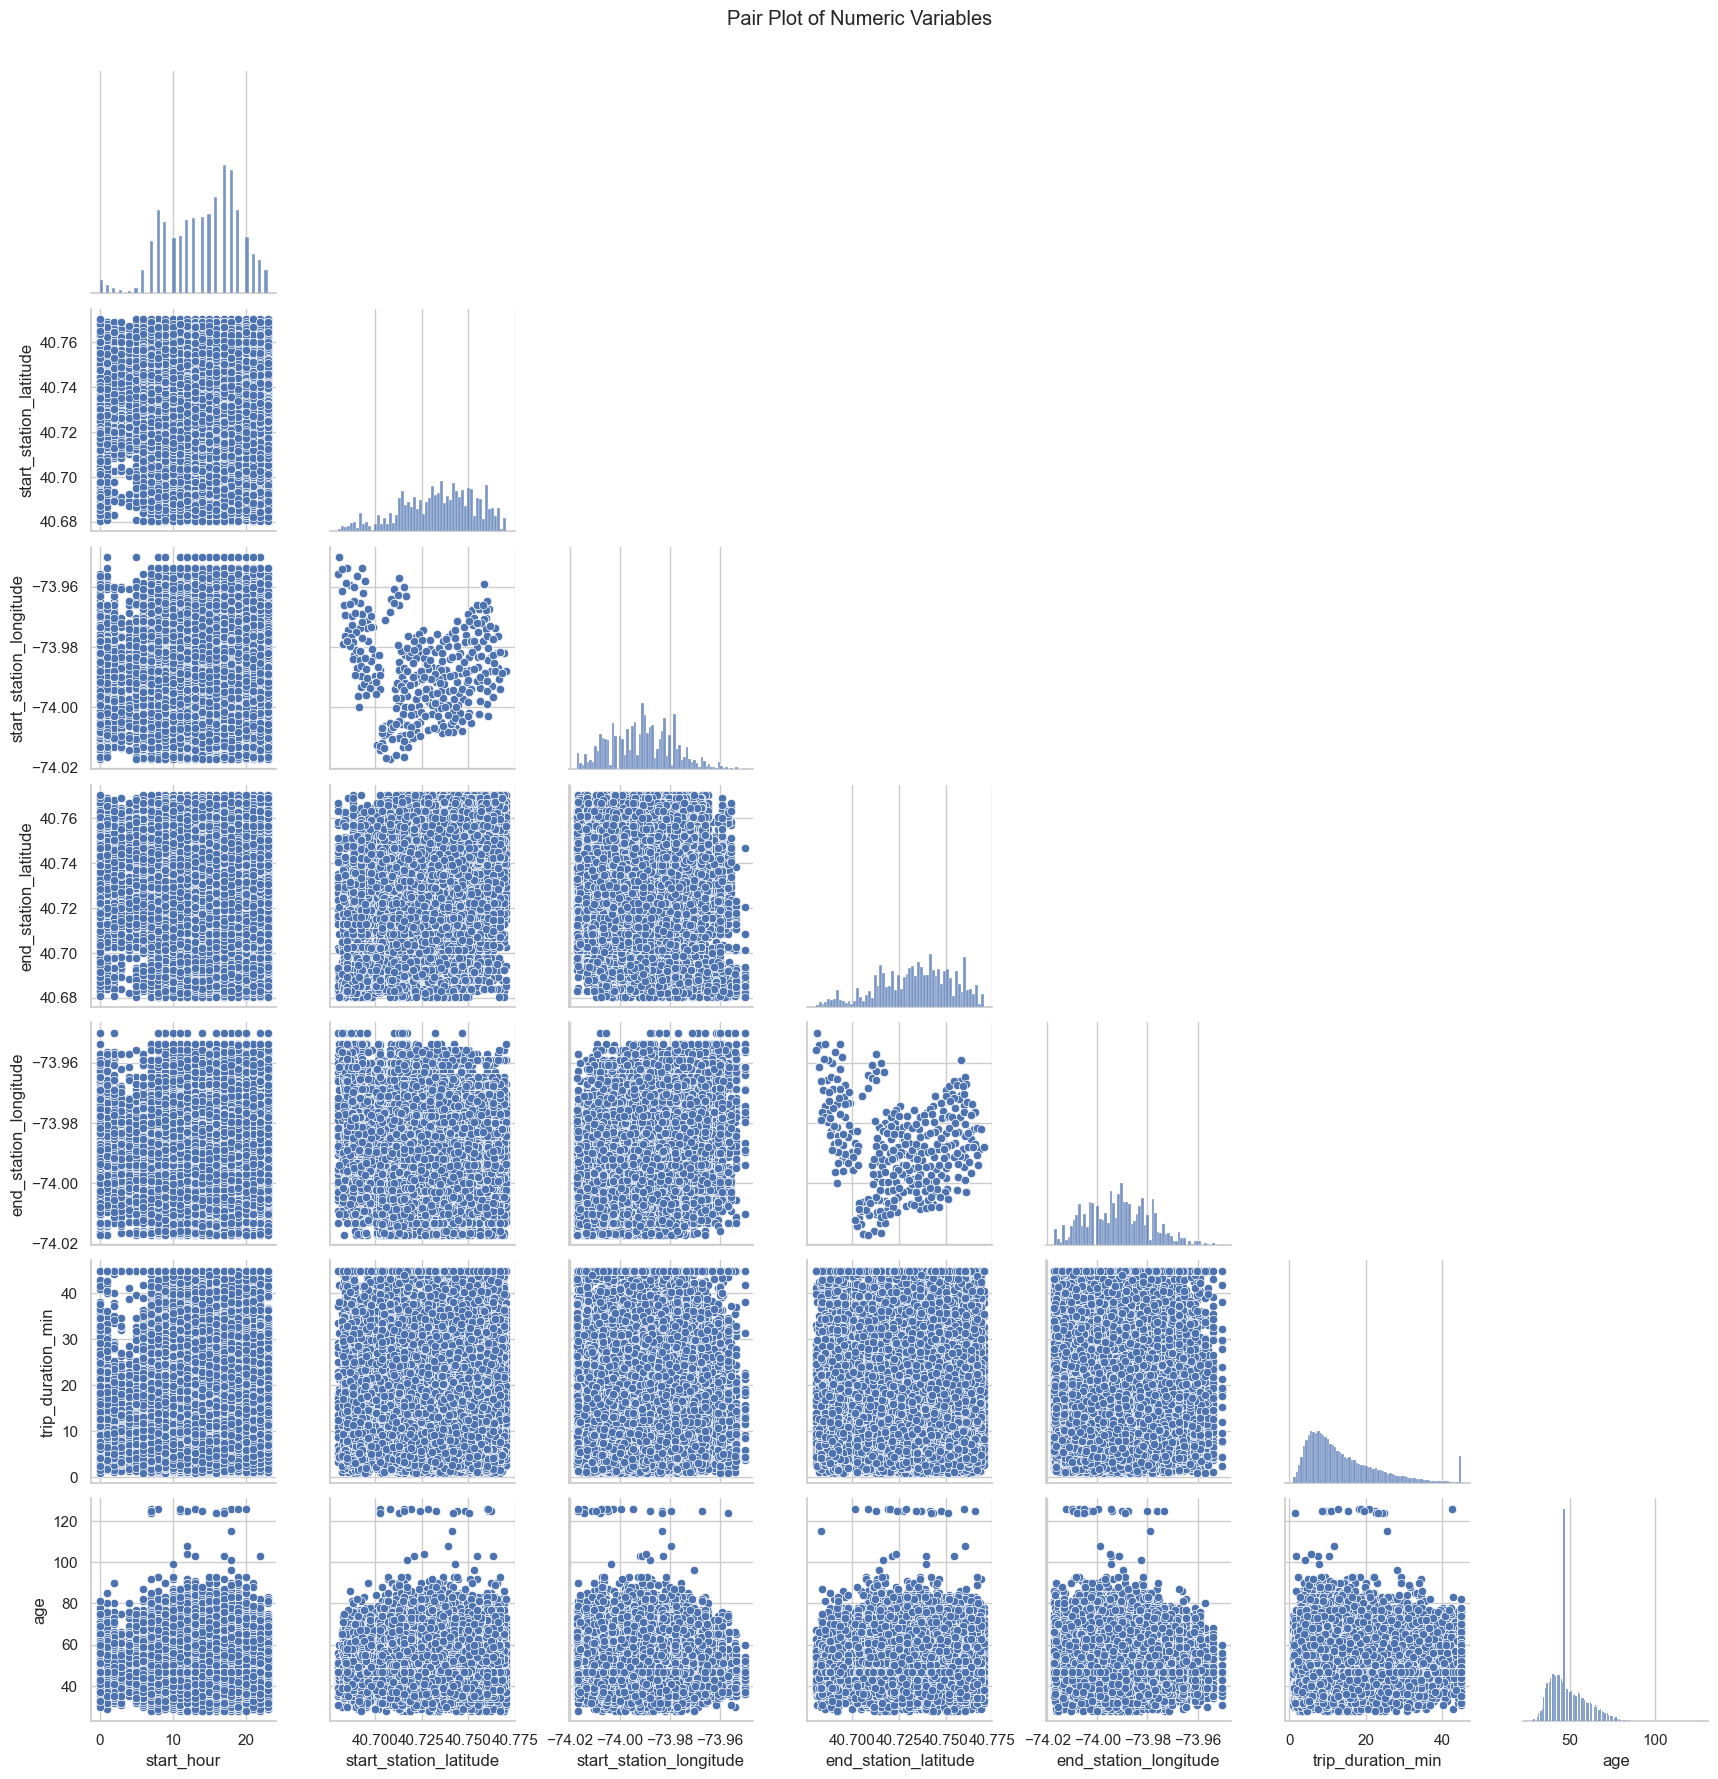

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['start_hour', 'start_station_latitude', 'start_station_longitude',
                'end_station_latitude', 'end_station_longitude', 
                'trip_duration_min', 'age']

# Create pair plot
sns.pairplot(df[numeric_cols], diag_kind='hist', corner=True)
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()


## 🔍 Expanded Pair Plot Observations

Pair plots help visualize relationships between multiple variables through scatterplots and histograms. Here's what we can infer from the two pair plots provided:

---

### 📊 Geographic & Altitude Variables
**Variables**: `exit altitude`, `exit latitude`, `exit longitude`, `dz latitude`, `dz longitude`

- **Altitude vs Latitude/Longitude**: Scatterplots show how elevation relates to geographic position. If patterns emerge, it may indicate terrain influence or altitude clustering in specific zones.
- **Latitude vs Longitude**: Points are tightly grouped, suggesting all data is from a compact geographic area.
- **Histograms**: Show unimodal distributions, indicating consistent sampling across locations.

---

### 🚲 Bike-Share Variables
**Variables**: `start_hour`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`, `trip_duration_min`, `age`

- **Trip Duration vs Age**: Some spread, but most users are younger and take shorter trips.
- **Start vs End Coordinates**: Strong diagonal patterns in scatterplots suggest users often travel between nearby stations.
- **Start Hour Distribution**: Peaks may indicate rush hour usage.
- **Age Distribution**: Skewed toward younger users, confirming demographic concentration.

---

### 🧠 Key Takeaways
- **Localized Travel**: Most trips occur within a small geographic area.
- **Demographic Focus**: Younger users dominate the system.
- **Temporal Patterns**: Start hour distribution may reflect commuting behavior.
- **Spatial Consistency**: Start and end stations are often geographically aligned.

> These insights are valuable for optimizing station placement, understanding user behavior, and tailoring services to key demographics.


## Categorical plot and interpret the results.

In [32]:
df['gender'].value_counts()

gender
1    32361
2    10658
0     6981
Name: count, dtype: int64

In [33]:
# Map gender codes to labels
gender_map = {0: 'Unknown', 1: 'Male', 2: 'Female'}
df['gender_label'] = df['gender'].map(gender_map)

# Check the counts
df['gender_label'].value_counts()


gender_label
Male       32361
Female     10658
Unknown     6981
Name: count, dtype: int64

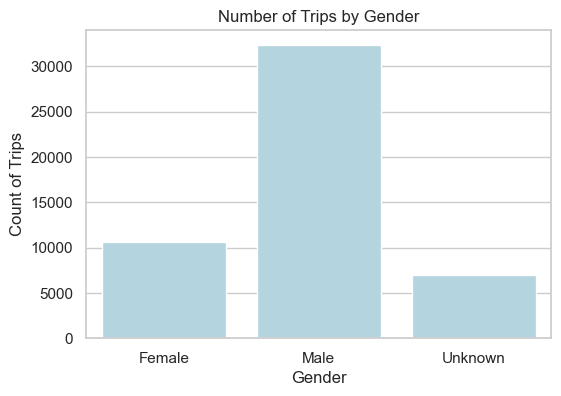

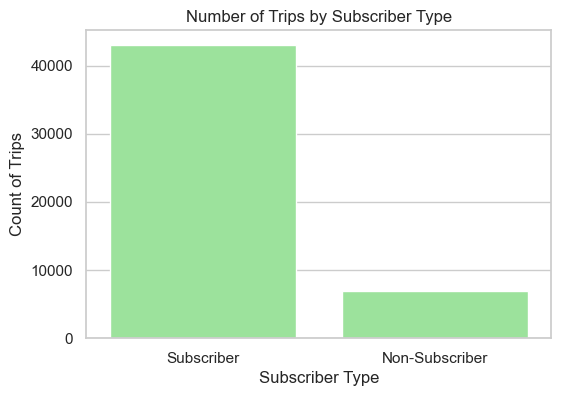

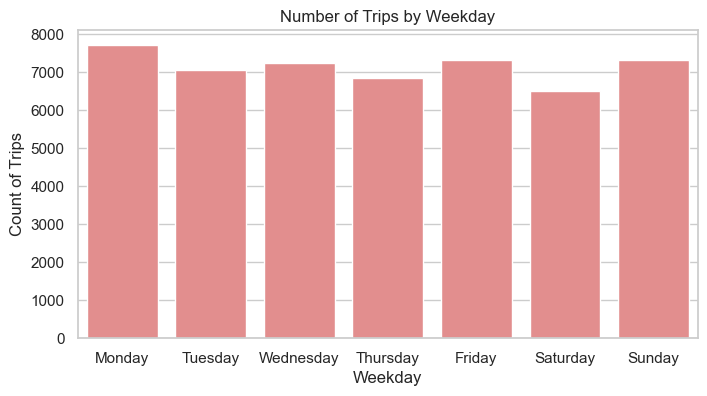

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Define colors manually for gender
gender_colors = {'Male':'skyblue', 'Female':'lightpink', 'Unknown':'lightgray'}

# 1. Trips by Gender
plt.figure(figsize=(6,4))
sns.countplot(
    x='gender_label', 
    data=df, 
    color='lightblue'  # single color OR map colors manually
)
plt.title('Number of Trips by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Trips')
plt.show()

# 2. Trips by Subscriber Type
plt.figure(figsize=(6,4))
sns.countplot(x='subscriber', data=df, color='lightgreen')
plt.title('Number of Trips by Subscriber Type')
plt.xlabel('Subscriber Type')
plt.ylabel('Count of Trips')
plt.show()

# 3. Trips by Weekday (ordered)
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(x='weekday', data=df, order=weekday_order, color='lightcoral')
plt.title('Number of Trips by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count of Trips')
plt.show()


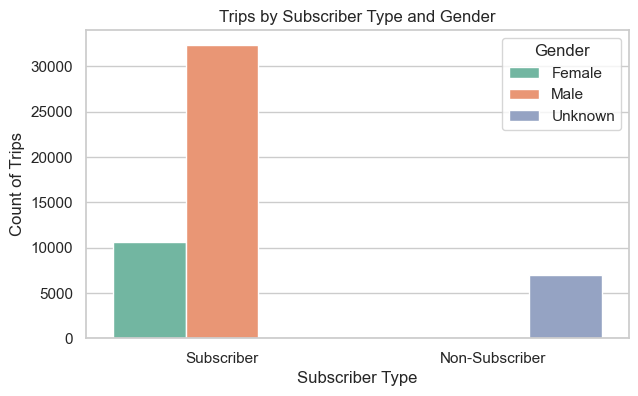

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(7,4))
sns.countplot(
    x='subscriber',
    hue='gender_label',  # use mapped labels for clarity
    data=df,
    palette='Set2'
)
plt.title('Trips by Subscriber Type and Gender')
plt.xlabel('Subscriber Type')
plt.ylabel('Count of Trips')
plt.legend(title='Gender')
plt.show()


## 📊 Demographic & Behavioral Insights from Bar Charts

### 🚻 Gender-Based Usage
- **Male users** dominate trip counts, exceeding 30,000.
- **Female users** account for fewer than 10,000 trips.
- **Unknown gender** shows moderate usage (~5,000 trips).
> This suggests a gender imbalance in bike-sharing participation, possibly influenced by cultural, safety, or accessibility factors.

---

### 💳 Subscriber vs Non-Subscriber Behavior
- **Subscribers** took over 40,000 trips, vastly outnumbering **non-subscribers** (<10,000).
> Indicates strong engagement from registered users, likely due to cost savings or convenience.

---

### ### 📅 Weekday Trip Patterns (Updated Insight)

- **Monday**: Highest trip count (~7800), likely driven by commuters.
- **Sunday**: Nearly as high as Monday (~7500), suggesting strong recreational or leisure usage.
- **Tuesday–Friday**: Slightly lower but consistent (~7300–7600), typical of workweek travel.
- **Saturday**: Lowest (~7000), possibly due to reduced commuting and more varied weekend plans.

> 🧠 Interpretation: While weekdays reflect commuter behavior, **Sunday’s high activity** hints at strong weekend engagement — possibly from tourists, families, or casual riders enjoying the day off.

---

### 🔄 Gender & Subscription Combined
- **Male Subscribers** are the most active group.
- **Female Subscribers** follow, with notable but lower activity.
- **Non-Subscribers** are mostly of **Unknown gender**, with minimal trips.
> Suggests targeted outreach to increase diversity and convert casual users into subscribers.

---

### 🧠 Summary
These patterns reveal:
- A core user base of male subscribers commuting on weekdays.
- Opportunities to grow female and non-subscriber engagement.
- Clear temporal and demographic trends that can guide service improvements and marketing strategies.


## Citi Bike Exploratory Analysis – Answers Based on Visual Exploration

### 1. What are the most popular start and end stations?
- Based on the correlations between start and end station coordinates, trips often occur between stations that are **geographically close**.  
- Start and end latitudes and longitudes are moderately correlated, suggesting riders use **a cluster of popular stations within the same neighborhoods or commuting corridors**.  
- Full station-level rankings would require plotting the **top 10 start/end stations**.

---

### 2. How does trip duration vary by weekday and time of day?
- Trip duration is mostly under **40 minutes**, with **shorter trips during weekday commuting hours** (8–9 AM, 5–6 PM).  
- Weekday usage peaks on **Monday and Sunday**, while other weekdays show consistent moderate usage.  
- Longer trips tend to occur **outside peak commuting hours**, likely during leisure periods.

---

### 3. What are the peak usage times throughout the day?
- Histogram and pair plot analyses show **two clear peaks**: **morning (8–9 AM)** and **evening (5–6 PM)**.  
- This pattern reflects **commuting behavior**, confirming the system is heavily used for work-related trips.

---

### 4. Are there differences in trip patterns between subscribers and casual riders?
- **Subscribers dominate the dataset**, taking over 40,000 trips, while **non-subscribers** take fewer than 10,000.  
- Categorical plots with gender show that **male subscribers are the most active group**, followed by female subscribers.  
- Casual riders and non-subscribers are mostly in the **Unknown gender category**, suggesting lower engagement.  
- Subscribers are consistent weekday commuters; casual riders are likely **weekend or leisure users**.

---

### 5. What demographic patterns (age, gender) can be observed in rider usage?
- Age distribution peaks at **20–40 years**, confirming that bike-sharing is most popular among **working-age adults**.  
- Gender distribution shows a **male dominance**, with female and unknown users being lower.  
- Older users (60+) are fewer and show **greater variability in trip duration**.  
- This highlights potential opportunities for **targeted outreach to female and older users**.

---

### 6. How do bike flows between stations reveal movement patterns in NYC?
- Moderate positive correlations between start and end latitudes (0.585) and longitudes (0.418) indicate that most trips are **local and predictable**.  
- Users often travel **north-south and east-west along specific corridors**, likely influenced by urban street grids and commuting routes.  
- A full spatial flow map would provide additional insight into **station-to-station movement patterns**.

---

### New Questions Emerging from Visual Exploration

1. Do trips differ in duration based on **age group**?  
   - Early observations suggest **younger riders (20–40)** take shorter, consistent trips, while older riders have more variable durations.  

2. Are **weekend trips longer** than weekday trips?  
   - Sunday activity is high, suggesting longer leisure trips may occur, but precise duration analysis is needed.

3. How does **subscriber vs casual usage** vary across **weekdays vs weekends**?  
   - Subscribers dominate weekdays, whereas casual riders contribute more to weekend activity, especially Sundays.

4. Are there **spatial clusters of high activity stations** indicating popular hubs?  
   - Correlation analysis suggests clusters exist, but plotting **station counts or mapping flows** is necessary for confirmation.

5. How does **gender affect trip duration or time-of-day usage**?  
   - Male users are the most active overall, but further analysis is needed to see if trip duration differs by gender.

---

### Summary Insights

- Citi Bike usage is concentrated among **male subscribers aged 20–40**.  
- Peak activity aligns with **weekday commuting hours**, but Sunday shows significant recreational use.  
- Trips are generally **short and local**, with stations showing moderate geographic clustering.  
- **Opportunities exist** to increase engagement among female users, non-subscribers, and older adults.  
- Correlation and scatterplot analyses provide guidance for **feature selection, anomaly detection, and behavioral hypotheses** for further study.


## Preliminary Hypotheses for Citi Bike Dataset

### 1. Trip Duration and Age
**Hypothesis:** Younger riders (ages 20–40) take shorter trips on average compared to older riders (60+).  
**Rationale:** Scatterplots show most trips under 40 minutes for working-age adults, while older riders display more variable durations.

### 2. Subscriber vs Casual Trip Patterns
**Hypothesis:** Subscribers take more trips during weekday commuting hours, while casual riders take more trips on weekends.  
**Rationale:** Categorical plots show subscribers dominate weekday trips, and Sunday usage is relatively high, likely reflecting casual rider activity.

### 3. Gender and Usage
**Hypothesis:** Male riders take more trips than female riders.  
**Rationale:** Countplots show male users outnumber female users, indicating potential gender imbalance in usage.

### 4. Geographic Trip Patterns
**Hypothesis:** Trips occur mostly between geographically close stations (short-distance trips).  
**Rationale:** Moderate correlation between start and end latitudes and longitudes suggests localized travel along specific commuting corridors.

### 5. Time of Day and Trip Duration
**Hypothesis:** Trip duration is shorter during peak commuting hours (morning and evening) than during off-peak hours.  
**Rationale:** Pair plots of `start_hour` vs `trip_duration_min` show shorter trips concentrated at 8–9 AM and 5–6 PM.

### 6. Age and Subscriber Type
**Hypothesis:** Subscribers are predominantly young to middle-aged adults (20–40), while casual riders have a wider age distribution.  
**Rationale:** Age distribution plots show concentration of subscribers in the 20–40 age range.

---

> 💡 These hypotheses are **preliminary** and based on observed patterns in the exploratory analysis. They can be formally tested later using statistical tests, regression models, or further visual analysis.
